In [29]:
import numpy as np
import pandas as pd
from scipy import interpolate
import processing

In [35]:
df = pd.read_excel('lipid_subtype.xlsx')
df = df.dropna(axis=1,how='all')
x = df.iloc[:,::2]
y = df.iloc[:,1::2]
col_stats = {}

curr_min = np.inf
for col in x:
    if x[col].max() < 3100:
        continue
    count = x[col].count()
    if count < curr_min:
        row = count
    col_stats['Min'] = [row, col]

new_wavenumbers = np.linspace(2700, 3100, 61)
new_dataset = {}
new_dataset[''] = new_wavenumbers
for idx, col in enumerate(x):
    X = x.iloc[:,idx].dropna().to_numpy()
    Y = y.iloc[:,idx].dropna().to_numpy()
    if X.max() < 3070:
        continue
    spline = interpolate.CubicSpline(X, Y, extrapolate=True)
    spectra = spline(new_wavenumbers)
    new_dataset[col] = processing.normalize(spectra-spectra.min())

In [36]:
dataset_df = pd.DataFrame(new_dataset)

filename = 'lipid_subtype_CH_61.csv'

# Save DataFrame to CSV
dataset_df.to_csv(filename, index=False)

print(f"Dictionary saved to {filename}")

Dictionary saved to lipid_subtype_CH_61.csv


In [37]:
dataset_df

,,Phosphatidylethanolamine,Phospholipid,Cholesterol,Cardiolipin,Sphingosine,Cholesterol ester,Dsg-Phosphatidylinositol,L-alpha-Phosphatidylinositol,L-alpha-Phosphatidylglycerol,...,Omega-3 25-5,Ceramide 24-0,Ceramide 22-0,Ceramide 24-1,Phosphatidylcholine 18-1,Phosphatidylethanolamine 18-1,"Ceramide 18-1,22-0","Deoxyceramide 18-1,24-1","Deoxyceramide 18-1,16-0","Dihydroceramide 18-0,14-0"
0,2700.000000,0.015953,0.034726,0.034251,0.033501,0.040557,0.042721,0.038351,0.037082,0.040457,...,0.005769,0.035869,0.038291,0.011001,0.051041,0.062547,0.047522,0.024202,0.027763,0.020353
1,2706.666667,0.027160,0.041152,0.035156,0.040575,0.047288,0.058051,0.046702,0.047030,0.052683,...,0.013409,0.046533,0.047475,0.023054,0.060224,0.071496,0.057975,0.034349,0.037606,0.029734
2,2713.333333,0.035808,0.044762,0.050728,0.051831,0.059040,0.084389,0.059588,0.063185,0.071861,...,0.012303,0.057815,0.059764,0.035630,0.069591,0.080125,0.073331,0.038764,0.051376,0.051948
3,2720.000000,0.045121,0.054345,0.050740,0.059461,0.071656,0.071996,0.063446,0.074839,0.075826,...,0.039515,0.068337,0.070748,0.047086,0.075730,0.085103,0.090386,0.054088,0.061608,0.069585
4,2726.666667,0.051768,0.057098,0.037033,0.063232,0.076641,0.070325,0.073282,0.078013,0.082456,...,0.037647,0.068471,0.070753,0.050578,0.077725,0.090551,0.088489,0.054530,0.071006,0.071669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,3073.333333,0.006523,0.013175,0.003776,0.019199,0.002888,0.009161,0.005896,0.012077,0.006989,...,0.080275,0.004687,0.005440,0.009633,0.012536,0.009768,0.004876,0.005950,0.003304,0.008704
57,3080.000000,0.011062,0.008996,0.001363,0.012183,0.001632,0.005116,0.006172,0.007131,0.004165,...,0.038342,0.004199,0.004341,0.008280,0.007014,0.006425,0.003313,0.003434,0.002547,0.008167
58,3086.666667,0.010801,0.005606,0.000231,0.006513,0.001165,0.003373,0.003563,0.003959,0.005164,...,0.030270,0.003005,0.003683,0.004347,0.003557,0.002860,0.001915,0.002779,0.001514,0.007915
59,3093.333333,0.004683,0.004317,0.000000,0.003265,0.001327,0.000676,0.001309,0.002505,0.003304,...,0.021809,0.001902,0.002218,0.003843,0.001163,0.001220,0.000000,0.002360,0.001111,0.007982


In [39]:
lipid = dataset_df['Phospholipid'].to_numpy()

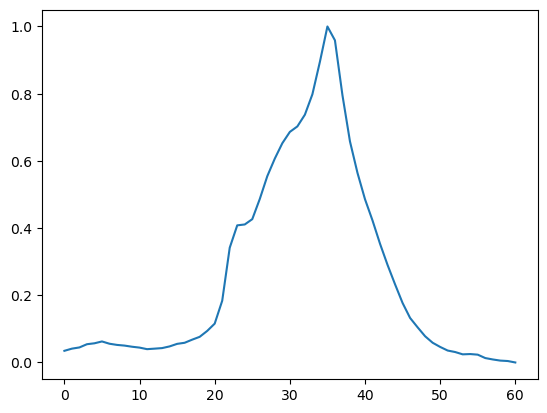

In [40]:
import matplotlib.pyplot as plt
plt.plot(lipid)